In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10)

In [10]:
pal = sns.color_palette()
pal.as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

## Graph for the test using 1k documents
 - Graph of total time of BF and LSH vs threshold

In [11]:
df = pd.read_csv('./tests/lsh_1core_1000.csv')
#df.head

In [12]:
x = df['Total Time'].tolist()
print(len(x))
reshaped=np.reshape(x[1:], (-1, 20))
means = np.mean(reshaped, axis=0)

61


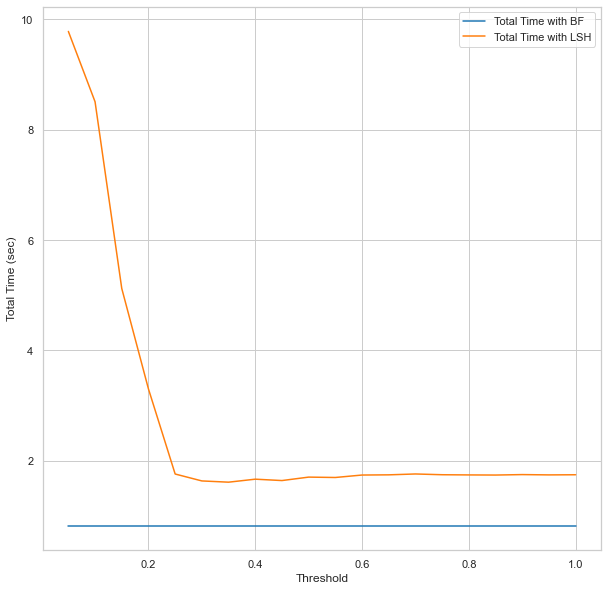

In [13]:
sns.set_theme(style="whitegrid")

threshold_list= np.arange(1.0, 0, -0.05)
plt.plot(threshold_list, [x[0] for _ in range(len(threshold_list))], c=pal[0], label='Total Time with BF')
plt.plot(threshold_list, means, c=pal[1], label='Total Time with LSH')

plt.legend(loc='upper right')
plt.xlabel("Threshold")
plt.ylabel("Total Time (sec)")
plt.savefig('./graphs/lsh_1k.png')

## Graphs for the test of 10k
 - Graph of total time of BF and LSH vs threshold for 1 and 6 cores using Global & Local Vectorizer with 32 permutations.
 

In [14]:
def plot1(choices, df1, df2, pal=['b','r','g','k'], lsh='l'):
    threshold_list= np.arange(1.0, 0.0, -0.05)
    for choice in choices:
        x1 = np.array(df1[choice])
        x2 = np.array(df2[choice])
        
        if choice == 'Total Time':
            plt.plot(threshold_list, [x1[0] for _ in range(len(threshold_list))], c=pal[0], label='Total Time with BF - 6 cores')
            plt.plot(threshold_list, [x2[0] for _ in range(len(threshold_list))], c=pal[1], label='Total Time with BF - 1 core')
        plt.plot(threshold_list, x1[1:], c=pal[2], label='Total Time with LSH - 6 cores')
        plt.plot(threshold_list, x2[1:], c=pal[3], label='Total Time with LSH - 1 core')
        plt.legend(loc='upper right')
        plt.xlabel('Threshold')
        plt.ylabel('Total time (sec)')
        plt.ylim(0, 1500)
        if lsh == 'l':
            plt.savefig('./graphs/lsh_10k_local_1vs6.png')
        else:
            plt.savefig('./graphs/lsh_10k_global_1vs6.png')

In [15]:
df_10k_lsh_6 = pd.read_csv('./tests/lsh_6cores_outputtable_10000.csv')
df_10k_lsh_1 = pd.read_csv('./tests/lsh_1core_outputtable_10000.csv')

df_10k_lsh1_6 = pd.read_csv('./tests/lsh1_6cores_outputtable_10000.csv')
df_10k_lsh1_1 = pd.read_csv('./tests/lsh1_1core_outputtable_10000.csv')

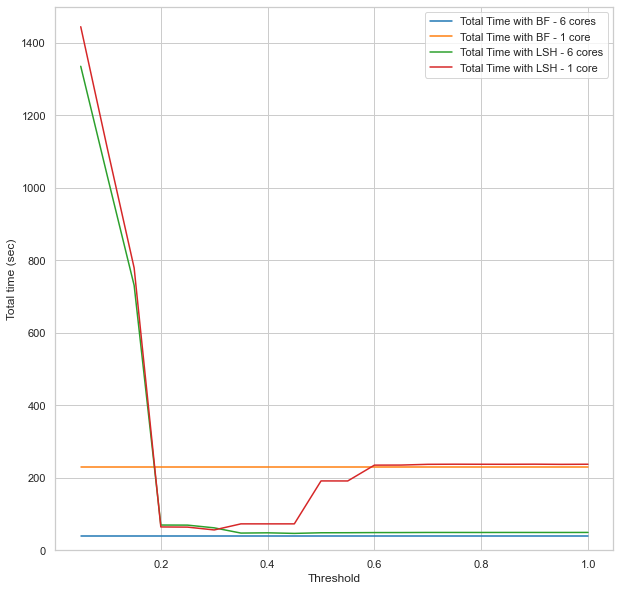

In [16]:
plot1(['Total Time'], df_10k_lsh_6, df_10k_lsh_1, [pal[i] for i in range(4)], 'l')

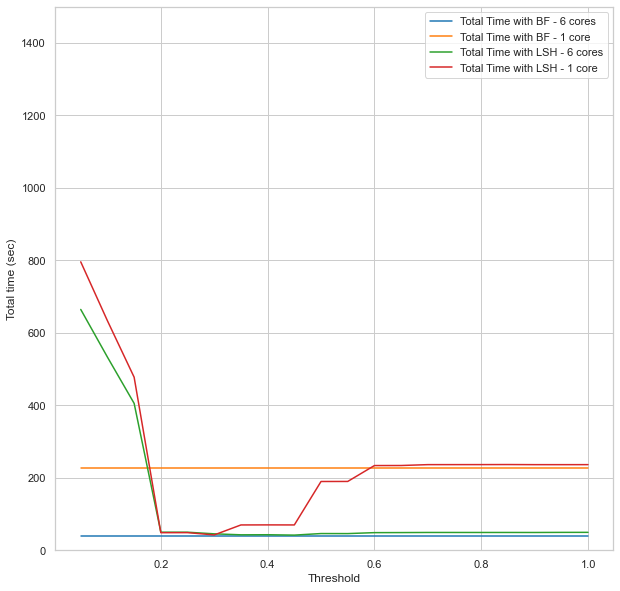

In [17]:
plot1(['Total Time'], df_10k_lsh1_6, df_10k_lsh1_1, [pal[i] for i in range(4)], 'g')

## Graphs for the test of 20k
 - Graph of total time of BF and LSH vs threshold for 1 and 6 cores using 64 permutations
 - Graph of accuracy vs threshold for 16, 32, 64 permutations
 - Graph of accuracy/total_time vs threshold for 1 and 6 cores using 16, 32, 64 permutations

In [18]:
df_20k_lsh1_6 = pd.read_csv('./tests/lsh1_6cores_outputtable_20000.csv')
df_20k_lsh1_1 = pd.read_csv('./tests/lsh1_1core_outputtable_20000.csv')

In [19]:
sum(df_20k_lsh1_1['Total Time'])/3600

10.892760057051976

In [20]:
#df_20k_lsh1_6
#df_20k_lsh1_1

In [21]:
indexes_6 = [0]
indexes_6.extend([i for i in range(29,43)])
indexes_6

indexes_1 = [0]
indexes_1.extend([i for i in range(29,44)])
indexes_1

[0, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

In [22]:
df_20k_lsh1_6_64 =df_20k_lsh1_6.iloc[indexes_6]
df_20k_lsh1_1_64 =df_20k_lsh1_1.iloc[indexes_1]

In [23]:
def plot2(choices, df1, df2, pal=['b','r','g','k']):
    threshold_list_1 = np.arange(0.8, 0.1, -0.05)
    threshold_list_2 = np.arange(0.8, 0.05, -0.05)
    for choice in choices:
        x1 = np.array(df1[choice])
        x2 = np.array(df2[choice])
        
        if choice == 'Total Time':
            plt.plot(threshold_list_2, [x1[0] for _ in range(len(threshold_list_2))], c=pal[0], label='Total Time with BF - 6 cores - 64 perms')
            plt.plot(threshold_list_2, [x2[0] for _ in range(len(threshold_list_2))], c=pal[1], label='Total Time with BF - 1 core - 64 perms')
        plt.plot(threshold_list_1, x1[1:], c=pal[2], label='Total Time with LSH - 6 cores - 64 perms')
        plt.plot(threshold_list_2, x2[1:], c=pal[3], label='Total Time with LSH - 1 core - 64 perms')
        plt.legend(loc='upper right')
        plt.xlabel('Threshold')
        plt.ylabel('Total time (sec)')
        plt.savefig('./graphs/lsh_20k_64_1vs6.png')

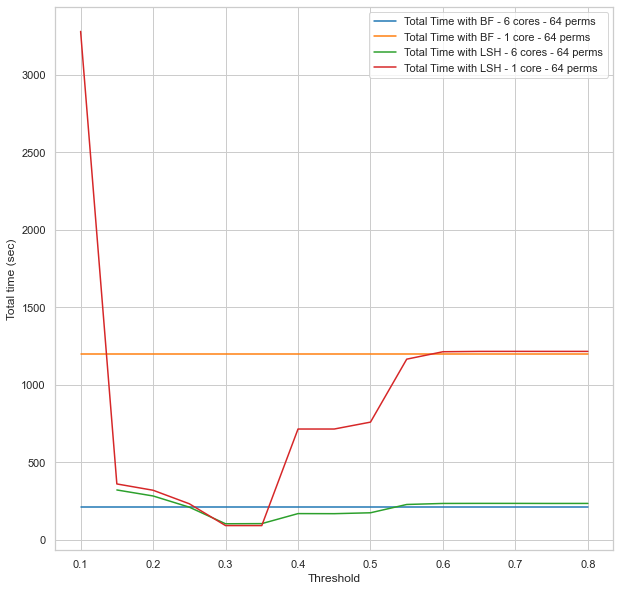

In [24]:
plot2(['Total Time'], df_20k_lsh1_6_64, df_20k_lsh1_1_64, [pal[i] for i in range(4)])

In [25]:
# Selecting Accuracy from .csv for 6 cores
accuracy_6cores = np.array(df_20k_lsh1_6['Accuracy'])

# Excluding the first element because it is the brute force with no LSH.
accuracy_6cores_no_bf = np.delete(accuracy_6cores, 0)

# Accuracy per permutation for 6 cores
# Index 0 - 16 perms
# Index 1 - 32 perms
# Index 0 - 64 perms
accuracy_6cores = [accuracy_6cores_no_bf[0:14], 
                    accuracy_6cores_no_bf[14:28],
                    accuracy_6cores_no_bf[28:]]

# Selecting Total Time from .csv for 6 cores
total_time_6cores = np.array(df_20k_lsh1_6['Total Time'])

# Excluding the first element because it is the brute force with no LSH.
total_time_6cores_no_bf = np.delete(total_time_6cores, 0)

# Total Time per permutation
# Same indexing as before
total_time_6cores = [total_time_6cores_no_bf[0:14],
                     total_time_6cores_no_bf[14:28],
                     total_time_6cores_no_bf[28:]]

In [26]:
# Selecting Accuracy from .csv for 1 core
accuracy_1core = np.array(df_20k_lsh1_1['Accuracy'])

# Excluding the first element because it is the brute force with no LSH.
accuracy_1core_no_bf = np.delete(accuracy_1core, 0)

# Accuracy per permutation for 1 core
accuracy_1core= [accuracy_1core_no_bf[0:13],
                 accuracy_1core_no_bf[13:28],
                 accuracy_1core_no_bf[28:]]


# Selecting Total Time from .csv for 1 core
total_time_1core = np.array(df_20k_lsh1_1['Total Time'])
# Excluding the first element because it is the brute force with no LSH.
total_time_1core_no_bf = np.delete(total_time_1core, 0)

# Total Time per permutation
total_time_1core = [total_time_1core_no_bf[0:13],
                    total_time_1core_no_bf[13:28],
                    total_time_1core_no_bf[28:]]

# 6 cores
accuracy_over_total_time_6cores = [accuracy_6cores[i]/total_time_6cores[i] for i in range(len(total_time_6cores))]

# 1 core
accuracy_over_total_time_1core = [accuracy_1core[i]/total_time_1core[i] for i in range(len(total_time_1core))]


In [27]:
# Threshold list of our experiments.
threshold_list = np.arange(0.8, 0.05, -0.05)
print(threshold_list)

[0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3  0.25 0.2  0.15
 0.1 ]


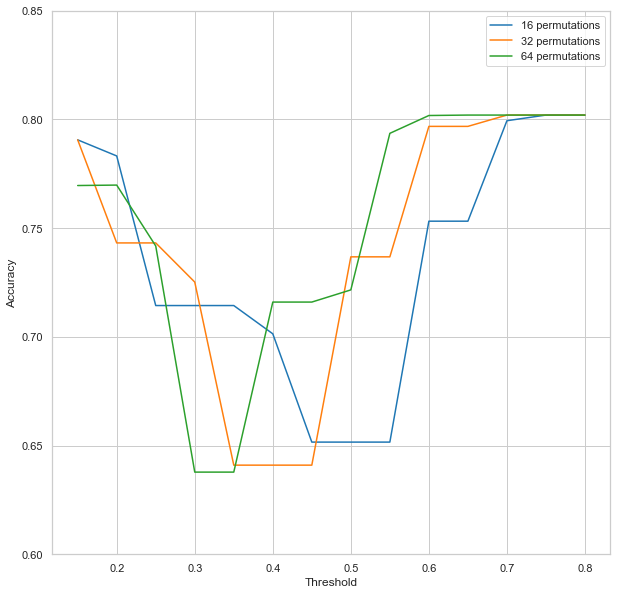

In [28]:
plt.plot(threshold_list[0:14], accuracy_6cores[0], c=pal[0], label='16 permutations')
plt.plot(threshold_list[0:14], accuracy_6cores[1], c=pal[1], label='32 permutations')
plt.plot(threshold_list[0:14], accuracy_6cores[2], c=pal[2], label='64 permutations')


plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.ylim(0.6,0.85)
plt.legend(loc='upper right')
plt.savefig('./graphs/lsh_20k_accvsthr.png')

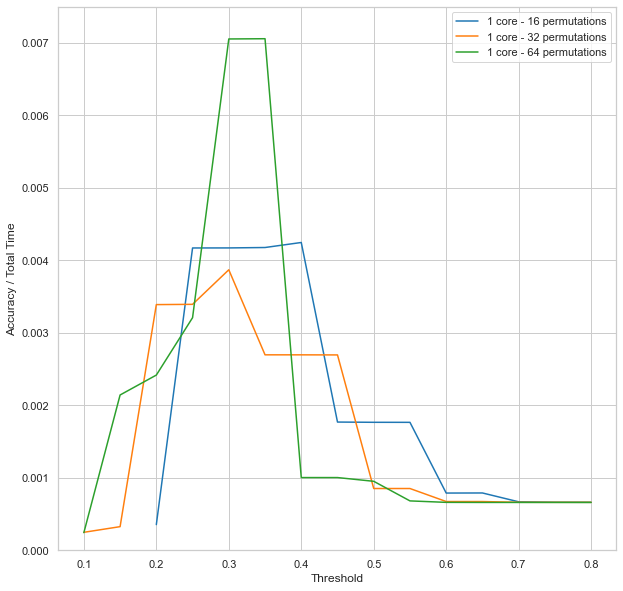

In [29]:
plt.plot(threshold_list[0:13], accuracy_over_total_time_1core[0], c=pal[0], label='1 core - 16 permutations')
plt.plot(threshold_list, accuracy_over_total_time_1core[1], c=pal[1], label='1 core - 32 permutations')
plt.plot(threshold_list, accuracy_over_total_time_1core[2], c=pal[2], label='1 core - 64 permutations')

plt.xlabel("Threshold")
plt.ylabel("Accuracy / Total Time")
plt.ylim(0,0.0075)
plt.legend(loc='upper right')
plt.savefig('./graphs/lsh_20k_1core_acctotaltime_vs_thr.png')

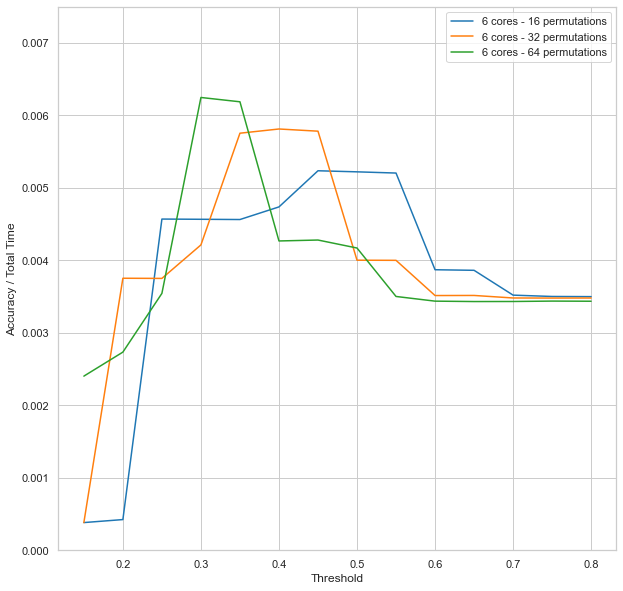

In [30]:
plt.plot(threshold_list[0:14], accuracy_over_total_time_6cores[0], c=pal[0], label='6 cores - 16 permutations')
plt.plot(threshold_list[0:14], accuracy_over_total_time_6cores[1], c=pal[1], label='6 cores - 32 permutations')
plt.plot(threshold_list[0:14], accuracy_over_total_time_6cores[2], c=pal[2], label='6 cores - 64 permutations')

plt.xlabel("Threshold")
plt.ylabel("Accuracy / Total Time")
plt.ylim(0,0.0075)
plt.legend(loc='upper right')
plt.savefig('./graphs/lsh_20k_6cores_acctotaltime_vs_thr.png')

[1214.46406698 1214.4838829  1214.53978753 1214.42391086 1212.1927681
 1164.32728219  758.02651453  713.50267577  713.51961017   90.36202025
   90.40572023  231.13453221  318.41420579  359.12542272 3279.30926776]
    Build Time  Query Time   LSH Time Threshold
0     1.290256    0.437470  98.272274       0.8
1     1.288684    0.428767  98.282550      0.75
2     1.294111    0.429133  98.276756       0.7
3     1.292502    0.428059  98.279439      0.65
4     1.297899    0.428968  98.273133       0.6
5     1.358847    0.445817  98.195336      0.55
6     2.093799    0.687722  97.218479       0.5
7     2.234460    0.733898  97.031643      0.45
8     2.237329    0.743140  97.019531       0.4
9    17.805499    5.823677  76.370824      0.35
10   17.821109    5.826395  76.352496       0.3
11    6.888458    2.374150  90.737392      0.25
12    5.084460    1.777784  93.137756       0.2
13    4.442401    1.603129  93.954470      0.15
14    0.471099    0.270892  99.258009       0.1


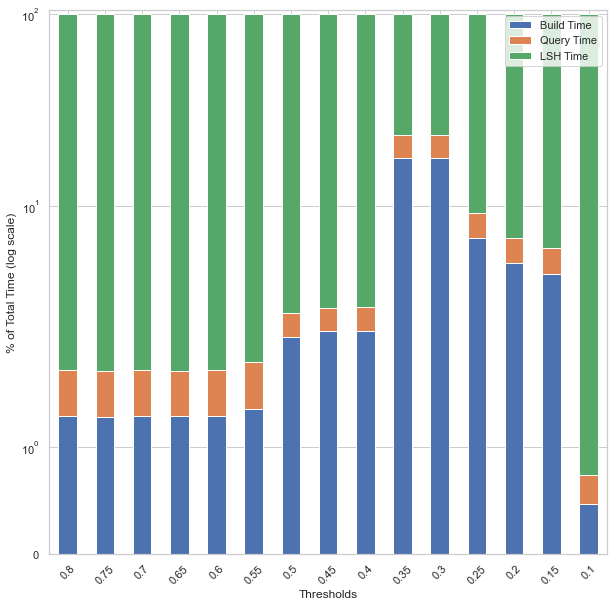

In [33]:
threshold = ["0.8", "0.75", "0.7", "0.65", "0.6", "0.55", "0.5", "0.45", "0.4", "0.35", "0.3", "0.25", "0.2", "0.15",
             "0.1"]

core1_20k_64perms_total_time = df_20k_lsh1_1['Total Time'][29:]
# print(core1_20k_64perms_total_time)

core1_20k_64perms = (df_20k_lsh1_1[['Build Time', 'Query Time', 'LSH Time']][29:])
# print(core1_20k_64perms)
total_time = np.array(core1_20k_64perms_total_time)
print(total_time)

for column in core1_20k_64perms:
    core1_20k_64perms[column] = core1_20k_64perms[column].div(total_time) * 100

core1_20k_64perms_divided = core1_20k_64perms.reset_index(drop=True)

core1_20k_64perms_divided['Threshold'] = threshold

print(core1_20k_64perms_divided)

figur = core1_20k_64perms_divided.set_index('Threshold').plot(kind='bar', stacked=True)

plt.xlabel('Thresholds')
plt.ylabel('% of Total Time (log scale)')

plt.yscale("symlog")

plt.xticks(rotation=45)
plt.savefig('./graphs/barplot.png')